<a href="https://colab.research.google.com/github/it22188236/DL-Labs/blob/main/Lab1/lab1_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#task 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

# drive.mount('/content/drive')
!cp /content/drive/MyDrive/Sample_Data/online_store_customer_data.csv /content/online_store_customer_data.csv

df = pd.read_csv('/content/online_store_customer_data.csv')
print(df.columns.to_list())
print('Data file mounted')


['Transaction_date', 'Transaction_ID', 'Gender', 'Age', 'Marital_status', 'State_names', 'Segment', 'Employees_status', 'Payment_method', 'Referal', 'Amount_spent']
Data file mounted


In [29]:
#2
# stats_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]
# print("Selected columns:", stats_df.columns.tolist())
# print("First 20 samples of the filtered DataFrame:")
# print(stats_df.head(20))
# print(stats_df.columns.tolist())
colums = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
try:
  stats_df = df[colums]
  print("Selected columns:", stats_df.columns.tolist())
except KeyError:
  print("Error: Specified columns not found. Selecting first 4 numerical columns as fallback.")
  stats_df = df.select_dtypes(include=['float64', 'int64']).iloc[:, :4]
  print("Selected columns:", stats_df.columns.tolist())
  if len(stats_df.columns) < 4:
        raise ValueError(f"Dataset has fewer than 4 numerical columns: {stats_df.columns.tolist()}")

Error: Specified columns not found. Selecting first 4 numerical columns as fallback.
Selected columns: ['Transaction_ID', 'Age', 'Referal', 'Amount_spent']


In [30]:
#3
stats = stats_df.describe().loc[['mean','std','25%','50%','75%']]
print(stats)

      Transaction_ID        Age   Referal  Amount_spent
mean   152443.931131  46.637652  0.652100   1418.422577
std       724.580482  18.186277  0.476405    878.507451
25%    151815.750000  32.000000  0.000000    678.192500
50%    152443.500000  47.000000  1.000000   1341.435000
75%    153071.250000  62.000000  1.000000   2038.102500


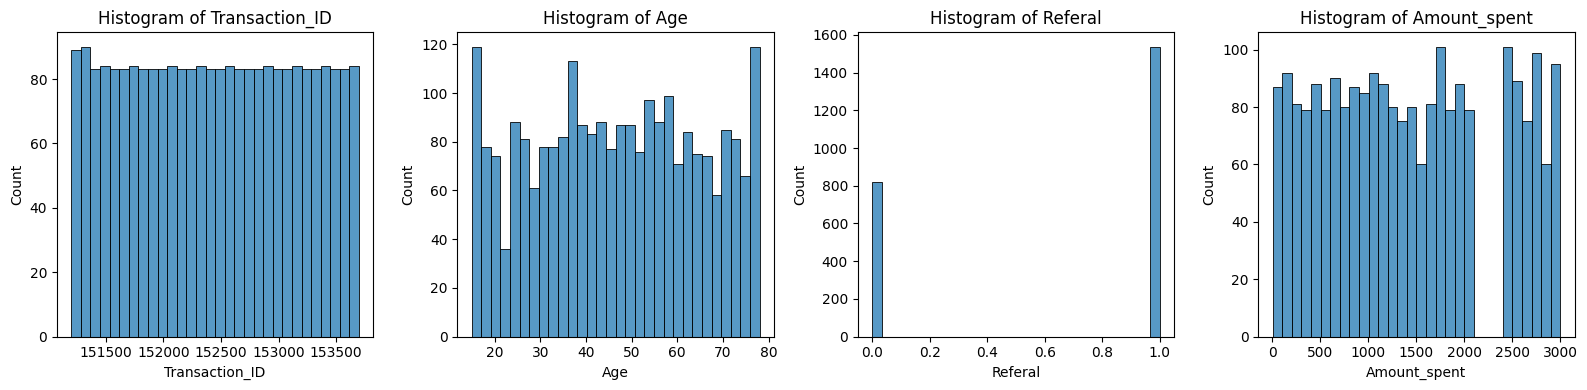

In [31]:
#4
plt.figure(figsize=(16, 4))
features = stats_df.columns
for i, feature in enumerate(features, 1):
    plt.subplot(1, 4, i)
    sns.histplot(stats_df[feature], bins=30, kde=False)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

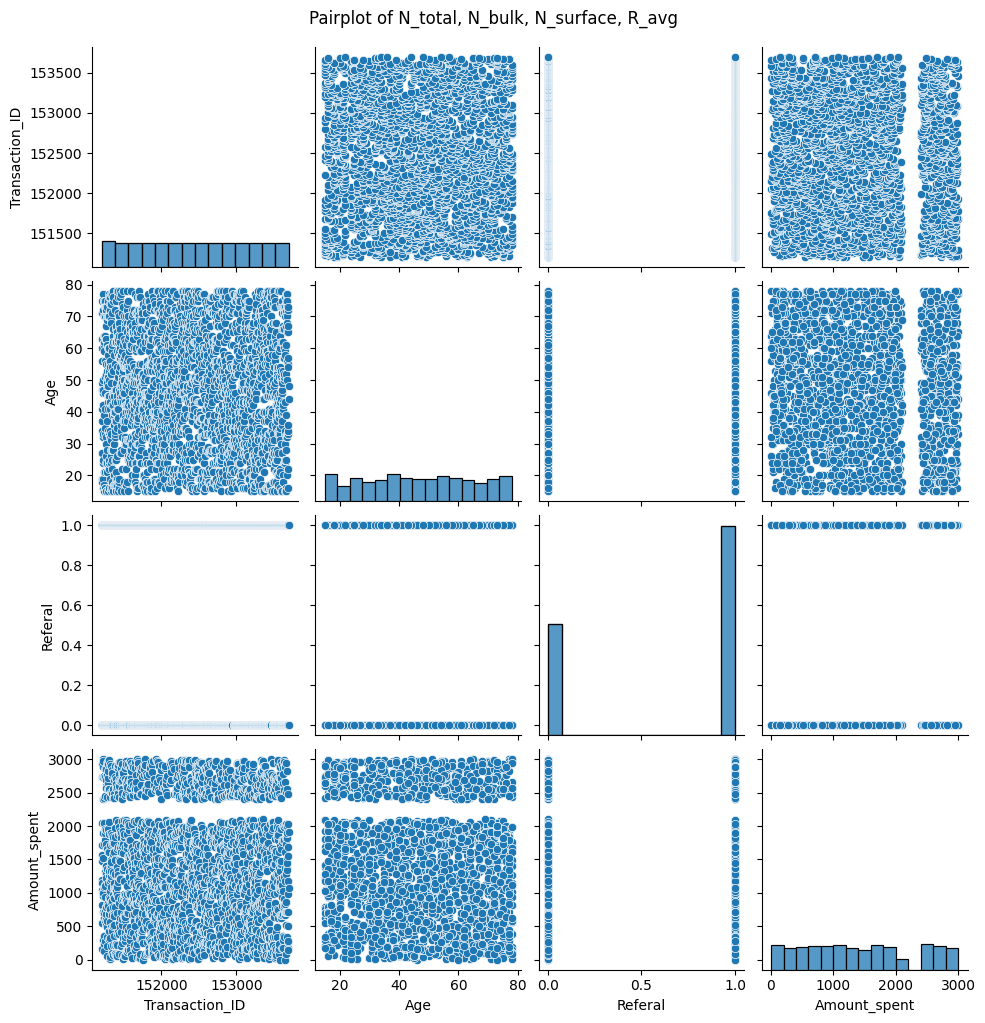

In [32]:
#5
sns.pairplot(stats_df)
plt.suptitle('Pairplot of N_total, N_bulk, N_surface, R_avg', y=1.02)
plt.show()

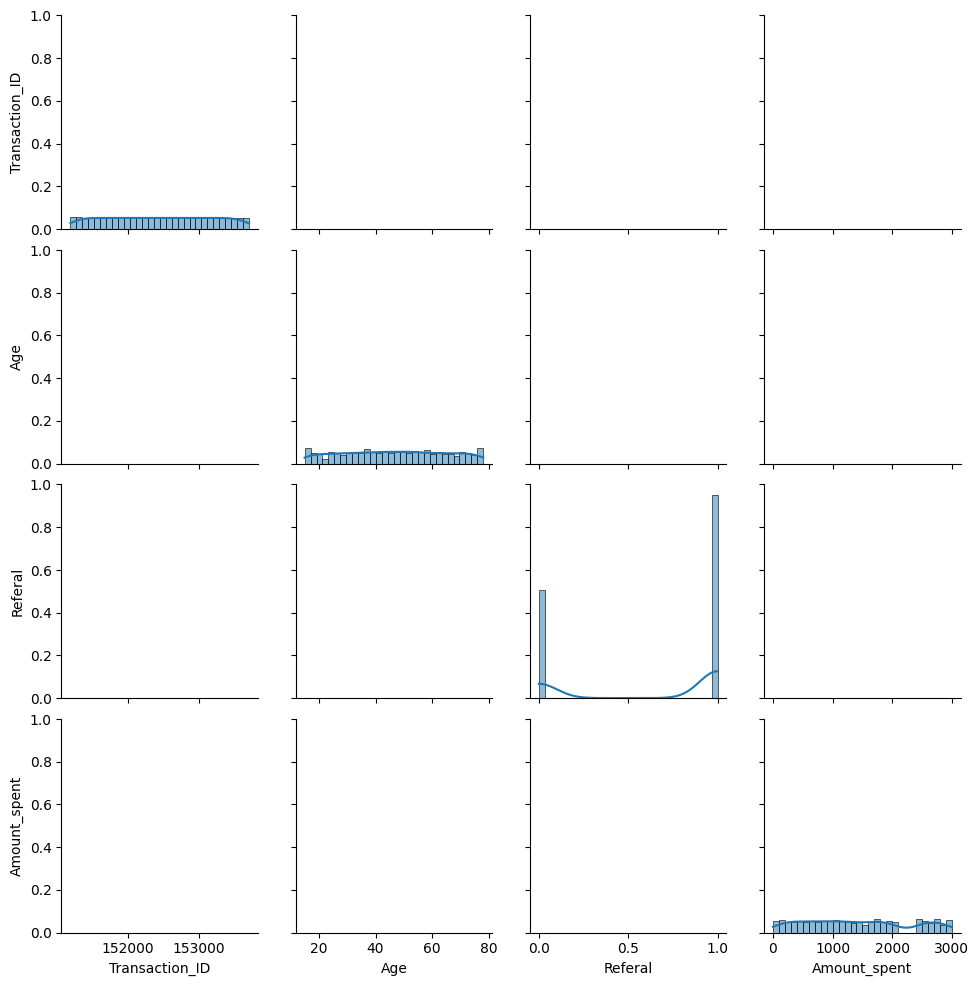

In [34]:
#6 a
g = sns.PairGrid(stats_df)
g.map_diag(sns.histplot, kde=True, bins=30)

In [38]:
#6 b
g.map_lower(sns.histplot)
g.map_upper(sns.histplot)
g.map_diag(sns.histplot)
plt.suptitle('Customized Pairplot with Histograms, KDE, and Bivariate KDE', y=1.02)
plt.show()

<Figure size 640x480 with 0 Axes>